In [43]:

import pandas as pd
import json
import plotly.graph_objects as go
import matplotlib.pyplot as plt

data_file = './export (11).csv'
df = pd.read_csv(data_file)
intervals = [0, 1, 10]
scores = [0, 55, 100]

def calculate_score(total_proposals):
    for i in range(len(intervals)):
        if total_proposals <= intervals[i]:
            return scores[i]
    return scores[-1]
scores_list = []
for total_proposals in df['Proposal Interaction In Space']:
    score = calculate_score(total_proposals)
    scores_list.append(score)
data_model_df = pd.DataFrame({
    'Address': df['Address'],
    'Proposal Interaction in space': df['Proposal Interaction In Space'],
    'Score': scores_list
})
with open('./totalProposalsMadeByUser.json', 'r') as json_file:
    data = json.load(json_file)
intervals = [0, 1]
scores = [0, 100]
addresses = []
proposal_creations_list = []
scores_list = []
for address, proposal_creations in data.items():
    addresses.append(address)
    proposal_creations_list.append(proposal_creations)
    if proposal_creations == 0:
        score = scores[0]
    else:
        score = scores[1]
    scores_list.append(score)
data_model_df2 = pd.DataFrame({
    'Address': addresses,
    'Proposal_Creation': proposal_creations_list,
    'Score': scores_list
})


merged_df = pd.merge(data_model_df, data_model_df2, on='Address', how='outer')
merged_df['Score_x'] = merged_df['Score_x'].fillna(0)
merged_df['Score_y'] = merged_df['Score_y'].fillna(0)
merged_df['Score'] = merged_df['Score_x'] + merged_df['Score_y']
merged_df = merged_df.drop(columns=['Score_x', 'Score_y'])
merged_df = merged_df.fillna(0)
merged_df['Proposal Interaction in space'] = merged_df['Proposal Interaction in space'].astype(int)
merged_df['Proposal_Creation'] = merged_df['Proposal_Creation'].astype(int)
merged_df['Score'] = merged_df['Score'].astype(int)
merged_df['Gov_reward'] = (merged_df['Score']/200)*100



In [44]:

merged_df.head(20)


,Address,Proposal Interaction in space,Proposal_Creation,Score,Gov_reward
0,0x329c54289Ff5D6B7b7daE13592C6B1EDA1543eD4,256,50,200,100.0
1,0xB83b3e9C8E3393889Afb272D354A7a3Bd1Fbcf5C,184,2,200,100.0
2,0x13BDaE8c5F0fC40231F0E6A4ad70196F59138548,96,1,200,100.0
3,0xB933AEe47C438f22DE0747D57fc239FE37878Dd1,151,0,100,50.0
4,0x55B16934C3661E1990939bC57322554d9B09f262,57,0,100,50.0
5,0xaFDAbFb6227507fF6522b8a242168F6b5F353a6E,33,0,100,50.0
6,0xc17cB209D5aBdb2d00f566a1E48F558DEBC264E1,25,1,200,100.0
7,0xdD709cAE362972cb3B92DCeaD77127f7b8D58202,15,0,100,50.0
8,0xdC1F98682F4F8a5c6d54F345F448437b83f5E432,29,0,100,50.0
9,0x9B5ea8C719e29A5bd0959FaF79C9E5c8206d0499,12,0,100,50.0


In [30]:

merged_df['Gov_reward'].min()

0.0

In [42]:
top_20_proposal_creations = merged_df.nlargest(20, 'Proposal_Creation')
proposals_interaction_counts = top_20_proposal_creations.groupby('Address')['Proposal Interaction in space'].sum()
plt.figure(figsize=(10, 6))
plt.bar(proposals_interaction_counts.index, proposals_interaction_counts.values, label='Proposal Interaction in Space')
plt.xlabel('Address')
plt.ylabel('Number of Proposals Interactions')
plt.title('Comparison of Proposal Interaction in Space for Top 20 Proposal Creations')
plt.legend()
plt.xticks(rotation=90)
plt.show()



NameError: name 'merged_df' is not defined

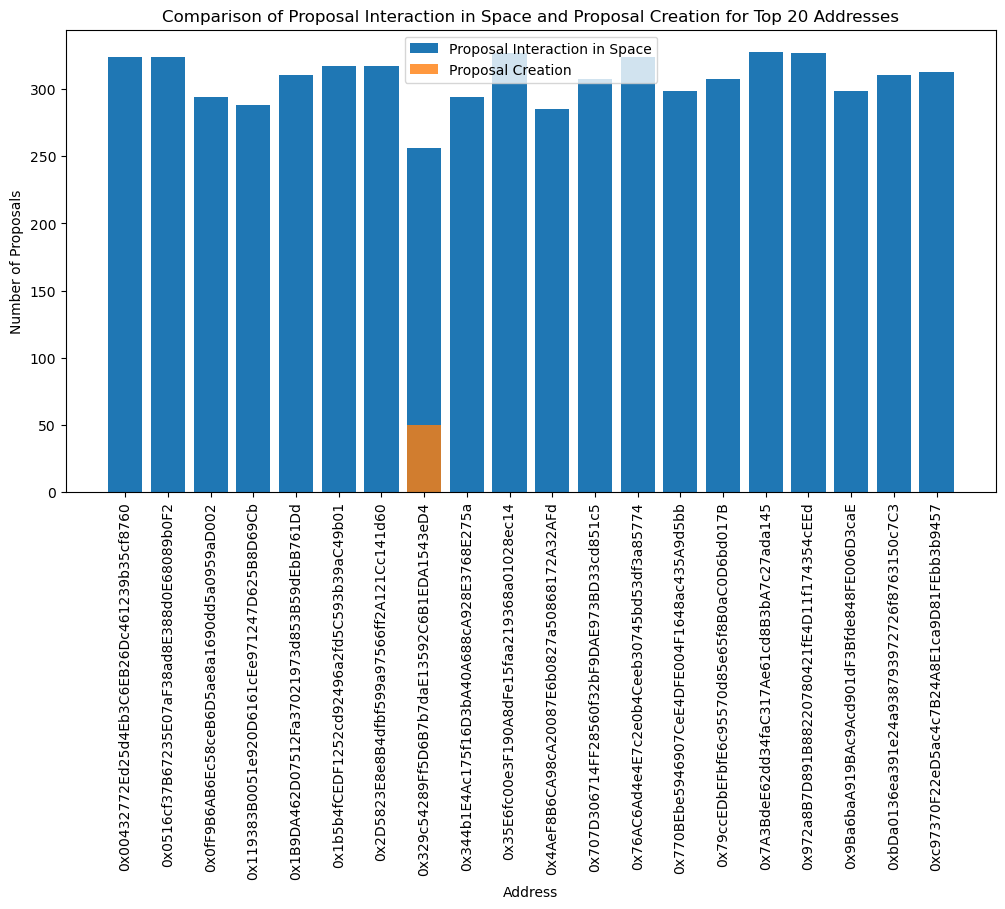

In [21]:

merged_df['Total_Activity'] = merged_df['Proposal Interaction in space'] + merged_df['Proposal_Creation']
top_20_addresses = merged_df.nlargest(20, 'Total_Activity')
proposals_interaction_counts = top_20_addresses.groupby('Address')['Proposal Interaction in space'].sum()
proposals_creation_counts = top_20_addresses.groupby('Address')['Proposal_Creation'].sum()
plt.figure(figsize=(12, 6))
plt.bar(proposals_interaction_counts.index, proposals_interaction_counts.values, label='Proposal Interaction in Space')
plt.bar(proposals_creation_counts.index, proposals_creation_counts.values, label='Proposal Creation', alpha=0.8)
plt.xlabel('Address')
plt.ylabel('Number of Proposals')
plt.title('Comparison of Proposal Interaction in Space and Proposal Creation for Top 20 Addresses')
plt.legend()
plt.xticks(rotation=90)
plt.show()


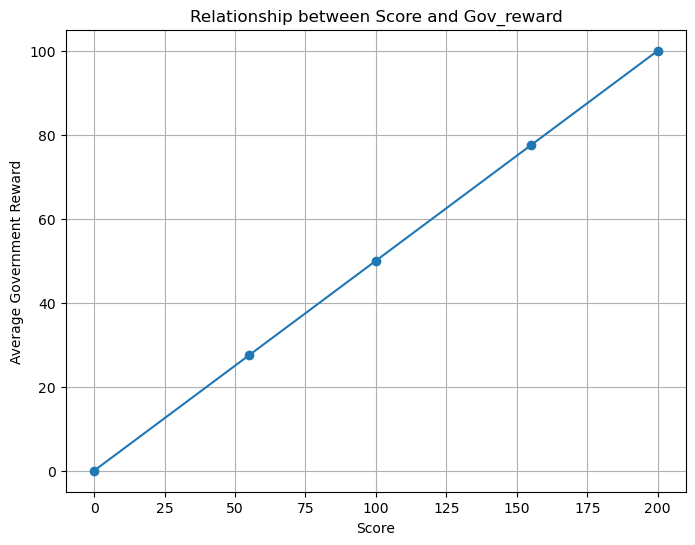

In [23]:

avg_reward_by_score = merged_df.groupby('Score')['Gov_reward'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_reward_by_score.index, avg_reward_by_score.values, marker='o', linestyle='-')
plt.xlabel('Score')
plt.ylabel('Average Government Reward')
plt.title('Relationship between Score and Gov_reward')
plt.grid(True)
plt.show()


In [25]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=merged_df['Gov_reward'],
                           nbinsx=30, 
                           name='Gov_reward'))

fig.update_layout(title='Population Distribution of Gov_reward',
                  xaxis_title='Gov_reward',
                  yaxis_title='Count')

fig.show()


In [2]:
import pandas as pd
df = pd.read_csv('./export (11).csv')

In [3]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, use a range of 100,000 intervals
    elif column.name == 'Total Votes':
        num_intervals = min(100000, unique_values)
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Create a DataFrame to store the intervals
interval_df = pd.DataFrame({col.replace(' ', '_').replace('`', ''): pd.Series(intervals_dict[col]) for col in selected_columns})

# Printing the DataFrame with the suggested intervals for each column
print(interval_df)


    Proposal_Interaction_In_Space Total_NFTs User_is_delegator  \
0                         (0, 66)    (0, 10)            (0, 0)   
1                       (66, 132)   (10, 20)             (>0,)   
2                      (132, 197)   (20, 30)               NaN   
3                      (197, 263)   (30, 40)               NaN   
4                      (263, 328)   (40, 50)               NaN   
..                            ...        ...               ...   
678                           NaN        NaN               NaN   
679                           NaN        NaN               NaN   
680                           NaN        NaN               NaN   
681                           NaN        NaN               NaN   
682                           NaN        NaN               NaN   

              Total_Votes  
0              (0, 49749)  
1          (49749, 99497)  
2         (99497, 149245)  
3        (149245, 198993)  
4        (198993, 248741)  
..                    ...  
678  (33729

50

In [4]:

import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, use a maximum of 7 intervals
    elif column.name == 'Total Votes':
        num_intervals = min(7, unique_values)
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Create a DataFrame to store the intervals
interval_df = pd.DataFrame({col.replace(' ', '_').replace('`', ''): pd.Series(intervals_dict[col]) for col in selected_columns})

# Define the scoring function to calculate the score based on intervals
def calculate_score(value, intervals):
    for i, interval in enumerate(intervals):
        if len(interval) == 1:
            if value == interval[0]:
                return 100
        else:
            if interval[0] <= value <= interval[1]:
                return (i + 1) * 20
    
    return 0

# Create a DataFrame to store the scores for each row in the selected columns
score_df = pd.DataFrame()

# Calculate scores for each row in the selected columns
for col in selected_columns:
    score_df[col] = df_selected[col].apply(lambda x: calculate_score(x, intervals_dict[col]))

# Printing the DataFrame with the scores for each row in the selected columns
print(score_df)


       Proposal Interaction In Space  Total NFT`s  User is delegator  \
0                                 80           20                 20   
1                                 60           20                 20   
2                                 40           20                 20   
3                                 60           60                 20   
4                                 20           20                 20   
...                              ...          ...                ...   
15891                             40          100                 20   
15892                             20           20                 20   
15893                             20           40                 20   
15894                             20          100                 20   
15895                             20           60                 20   

       Total Votes  
0              140  
1               80  
2               40  
3               40  
4               20  
...      

In [6]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, use intervals with a range of 5,000,000
    elif column.name == 'Total Votes':
        num_intervals = math.ceil(range_val / 5000000)
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Printing the intervals for each column
for col, intervals in intervals_dict.items():
    print(f"\nColumn: {col}")
    print("Suggested Intervals:")
    for interval in intervals:
        print(f"{interval[0]} - {interval[1]}" if len(interval) == 2 else f"{interval[0]}")



Column: Proposal Interaction In Space
Suggested Intervals:
0 - 66
66 - 132
132 - 197
197 - 263
263 - 328
>328

Column: Total NFT`s
Suggested Intervals:
0 - 10
10 - 20
20 - 30
30 - 40
40 - 50
>50

Column: User is delegator
Suggested Intervals:
0 - 0
>0

Column: Total Votes
Suggested Intervals:
0 - 4846893
4846893 - 9693786
9693786 - 14540679
14540679 - 19387572
19387572 - 24234465
24234465 - 29081358
29081358 - 33928250
>33928250


In [7]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, use intervals with a range of 5,000,000
    elif column.name == 'Total Votes':
        num_intervals = 5
        interval_size = 5000000
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Printing the intervals for each column
for col, intervals in intervals_dict.items():
    print(f"\nColumn: {col}")
    print("Suggested Intervals:")
    for interval in intervals:
        print(f"{interval[0]} - {interval[1]}" if len(interval) == 2 else f"{interval[0]}")



Column: Proposal Interaction In Space
Suggested Intervals:
0 - 66
66 - 132
132 - 197
197 - 263
263 - 328
>328

Column: Total NFT`s
Suggested Intervals:
0 - 10
10 - 20
20 - 30
30 - 40
40 - 50
>50

Column: User is delegator
Suggested Intervals:
0 - 0
>0

Column: Total Votes
Suggested Intervals:
0 - 5000000
5000000 - 10000000
10000000 - 15000000
15000000 - 20000000
20000000 - 25000000
>33928250


In [8]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, use intervals with a range of 5,000,000
    elif column.name == 'Total Votes':
        num_intervals = 5
        interval_size = 5000000
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Create a DataFrame to store the intervals
interval_df = pd.DataFrame({col: pd.Series(intervals_dict[col]) for col in selected_columns})

# Printing the DataFrame with the suggested intervals for each column
print(interval_df)


  Proposal Interaction In Space Total NFT`s User is delegator  \
0                       (0, 66)     (0, 10)            (0, 0)   
1                     (66, 132)    (10, 20)             (>0,)   
2                    (132, 197)    (20, 30)               NaN   
3                    (197, 263)    (30, 40)               NaN   
4                    (263, 328)    (40, 50)               NaN   
5                       (>328,)      (>50,)               NaN   

            Total Votes  
0          (0, 5000000)  
1   (5000000, 10000000)  
2  (10000000, 15000000)  
3  (15000000, 20000000)  
4  (20000000, 25000000)  
5          (>33928250,)  


In [9]:

interval_df

,Proposal Interaction In Space,Total NFT`s,User is delegator,Total Votes
0,"(0, 66)","(0, 10)","(0, 0)","(0, 5000000)"
1,"(66, 132)","(10, 20)","(>0,)","(5000000, 10000000)"
2,"(132, 197)","(20, 30)",NaN,"(10000000, 15000000)"
3,"(197, 263)","(30, 40)",NaN,"(15000000, 20000000)"
4,"(263, 328)","(40, 50)",NaN,"(20000000, 25000000)"
5,"(>328,)","(>50,)",NaN,"(>33928250,)"


In [16]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, use intervals with a range of 5,000,000
    elif column.name == 'Total Votes':
        num_intervals = 7
        interval_size = 5000000
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Function to calculate the score for each interval
def calculate_score(interval, total_intervals):
    if pd.notna(interval):
        score = (total_intervals - interval) * (100 / (total_intervals - 1))
    else:
        score = None
    return int(math.ceil(score / 10.0) * 10)

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Create a DataFrame to store the intervals and scores
interval_df = pd.DataFrame({col: pd.Series(intervals_dict[col]) for col in selected_columns})

# Calculate and assign scores for each interval
for col in selected_columns:
    total_intervals = len(interval_df[col].dropna())
    interval_df[col] = interval_df[col].apply(lambda interval: calculate_score(interval_df[col].tolist().index(interval), total_intervals))

# Fill NaN values in the DataFrame with 0 (no score)
interval_df = interval_df.fillna(0)

# Normalize scores to ensure the sum is 100 for each column
interval_df = (interval_df / interval_df.sum()) * 100

# Round each score to the nearest tens and convert to integers
interval_df = interval_df.round(0).astype(int)

# Printing the DataFrame with the suggested intervals and scores for each column
print(interval_df)


   Proposal Interaction In Space  Total NFT`s  User is delegator  Total Votes
0                             29           29                 67           22
1                             24           24                 33           18
2                             19           19                  0           16
3                             14           14                  0           15
4                             10           10                  0           11
5                              5            5                  0            9
6                              0            0                  0            5
7                              0            0                  0            4


In [21]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction in space', 'Proposal_Creation', 'Score', 'Gov_reward']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column, interval_range):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        # Determine the number of intervals based on the range of values
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col], 100)

# Create a DataFrame to store the intervals
interval_df = pd.DataFrame({col: [str(interval) for interval in intervals_dict[col]] for col in selected_columns})

# Function to calculate the score for each interval
def calculate_score(interval, min_val, max_val, total_intervals):
    if len(interval) == 2:
        interval_min, interval_max = interval
        interval_range = interval_max - interval_min
        score = ((total_intervals - interval_range) / total_intervals) * 100
        return round(score)
    else:
        return 0

# Calculate scores for each interval in each column
score_df = pd.DataFrame()
for col in selected_columns:
    min_val = df_selected[col].min()
    max_val = df_selected[col].max()
    total_intervals = len(intervals_dict[col])
    score_df[col] = intervals_dict[col]
    score_df[col + ' Score'] = score_df[col].apply(lambda interval: calculate_score(eval(interval), min_val, max_val, total_intervals))

# Normalize scores to ensure the sum is 100 for each column
score_df[selected_columns] = score_df[selected_columns].apply(lambda x: x / 100)
score_df[selected_columns] = score_df[selected_columns].div(score_df[selected_columns].sum(axis=1), axis=0) * 100
score_df[selected_columns] = score_df[selected_columns].round(0).astype(int)

# Drop unnecessary columns and reset the index
interval_df.reset_index(drop=True, inplace=True)
score_df.reset_index(drop=True, inplace=True)

# Printing the DataFrames with the intervals and their corresponding scores for each column
print("Intervals:")
print(interval_df)
print("\nScores:")
print(score_df)


KeyError: "None of [Index(['Proposal Interaction in space', 'Proposal_Creation', 'Score',\n       'Gov_reward'],\n      dtype='object')] are in the [columns]"

In [22]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, use intervals with a range of 5,000,000
    elif column.name == 'Total Votes':
        num_intervals = 7
        interval_size = 5000000
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Function to calculate the score for each interval
def calculate_score(interval, total_intervals):
    if pd.notna(interval):
        score = (total_intervals - interval) * (100 / (total_intervals - 1))
    else:
        score = None
    return int(math.ceil(score / 10.0) * 10)

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Create a DataFrame to store the intervals
interval_df = pd.DataFrame({col: pd.Series(intervals_dict[col]) for col in selected_columns})

# Create a DataFrame to store the scores
score_df = pd.DataFrame(columns=selected_columns)

# Calculate and assign scores for each interval
for col in selected_columns:
    total_intervals = len(interval_df[col].dropna())
    scores = [calculate_score(interval_df[col].tolist().index(interval), total_intervals) for interval in interval_df[col]]
    score_df[col] = scores

# Fill NaN values in the DataFrame with 0 (no score)
interval_df = interval_df.fillna(0)
score_df = score_df.fillna(0)

# Normalize scores to ensure the sum is 100 for each column
score_df = (score_df / score_df.sum()) * 100

# Round each score to the nearest tens and convert to integers
score_df = score_df.round(0).astype(int)

# Printing the DataFrames with the suggested intervals and scores for each column
print("Interval DataFrame:")
print(interval_df)
print("\nScore DataFrame:")
print(score_df)


Interval DataFrame:
  Proposal Interaction In Space Total NFT`s User is delegator  \
0                       (0, 66)     (0, 10)            (0, 0)   
1                     (66, 132)    (10, 20)             (>0,)   
2                    (132, 197)    (20, 30)                 0   
3                    (197, 263)    (30, 40)                 0   
4                    (263, 328)    (40, 50)                 0   
5                       (>328,)      (>50,)                 0   
6                             0           0                 0   
7                             0           0                 0   

            Total Votes  
0          (0, 5000000)  
1   (5000000, 10000000)  
2  (10000000, 15000000)  
3  (15000000, 20000000)  
4  (20000000, 25000000)  
5  (25000000, 30000000)  
6  (30000000, 35000000)  
7          (>33928250,)  

Score DataFrame:
   Proposal Interaction In Space  Total NFT`s  User is delegator  Total Votes
0                             29           29                 67

In [24]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, use intervals with a range of 5,000,000
    elif column.name == 'Total Votes':
        num_intervals = 7
        interval_size = 5000000
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Function to calculate the score for each interval
def calculate_score(interval_index, total_intervals):
    score = (total_intervals - interval_index - 1) * (100 / (total_intervals - 1))
    return int(math.ceil(score / 10.0) * 10)

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Create a DataFrame to store the intervals
interval_df = pd.DataFrame({col: pd.Series(intervals_dict[col]) for col in selected_columns})

# Create a DataFrame to store the scores
score_df = pd.DataFrame(columns=selected_columns)

# Calculate and assign scores for each interval
for col in selected_columns:
    total_intervals = len(interval_df[col].dropna())
    scores = [calculate_score(i, total_intervals) for i in range(total_intervals)]
    score_df[col] = scores

# Fill NaN values in the DataFrame with 0 (no score)
interval_df = interval_df.fillna(0)
score_df = score_df.fillna(0)

# Normalize scores to ensure the sum is 100 for each column
score_df = (score_df / score_df.sum()) * 100

# Round each score to the nearest tens and convert to integers
score_df = score_df.round(0).astype(int)

# Printing the DataFrames with the suggested intervals and scores for each column
print("Interval DataFrame:")
print(interval_df)
print("\nScore DataFrame:")
print(score_df)


ValueError: Length of values (2) does not match length of index (6)

In [29]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, divide into 5 intervals
    elif column.name == 'Total Votes':
        num_intervals = 5
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Function to calculate the score for each interval
def calculate_score(interval_index, total_intervals):
    score = (total_intervals - interval_index - 1) * (100 / (total_intervals - 1))
    return int(math.ceil(score / 10.0) * 10)

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Create a DataFrame to store the intervals
interval_df = pd.DataFrame({col: pd.Series(intervals_dict[col]) for col in selected_columns})

# Create a DataFrame to store the scores
score_df = pd.DataFrame(columns=selected_columns)

# Calculate and assign scores for each interval
for col in selected_columns:
    total_intervals = len(interval_df[col].dropna())
    scores = [calculate_score(i, total_intervals) for i in range(total_intervals)]
    score_df[col] = scores

# Fill NaN values in the DataFrame with 0 (no score)
interval_df = interval_df.fillna(0)
score_df = score_df.fillna(0)

# Normalize scores to ensure the sum is 100 for each column
score_df = (score_df / score_df.sum()) * 100

# Round each score to the nearest tens and convert to integers
score_df = score_df.round(0).astype(int)

# Printing the DataFrames with the suggested intervals and scores for each column
print("Interval DataFrame:")
print(interval_df)
print("\nScore DataFrame:")
print(score_df)


ValueError: Length of values (2) does not match length of index (6)

In [30]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, use 5 intervals with equal interval size
    elif column.name == 'Total Votes':
        num_intervals = 5
        interval_size = math.ceil(range_val / num_intervals)
        intervals = [(min_val + i * interval_size, min(max_val, min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Function to calculate the score for each interval
def calculate_score(interval, total_intervals):
    if pd.notna(interval):
        score = (total_intervals - interval) * (100 / (total_intervals - 1))
    else:
        score = None
    return int(math.ceil(score / 10.0) * 10)

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Create a DataFrame to store the intervals
interval_df = pd.DataFrame({col: pd.Series(intervals_dict[col]) for col in selected_columns})

# Create a DataFrame to store the scores
score_df = pd.DataFrame(columns=selected_columns)

# Calculate and assign scores for each interval
for col in selected_columns:
    total_intervals = len(interval_df[col].dropna())
    scores = [calculate_score(interval_df[col].tolist().index(interval), total_intervals) for interval in interval_df[col]]
    score_df[col] = scores

# Fill NaN values in the DataFrame with 0 (no score)
interval_df = interval_df.fillna(0)
score_df = score_df.fillna(0)

# Normalize scores to ensure the sum is 100 for each column
score_df = (score_df / score_df.sum()) * 100

# Round each score to the nearest tens and convert to integers
score_df = score_df.round(0).astype(int)

# Printing the DataFrames with the suggested intervals and scores for each column
print("Interval DataFrame:")
print(interval_df)
print("\nScore DataFrame:")
print(score_df)


Interval DataFrame:
  Proposal Interaction In Space Total NFT`s User is delegator  \
0                       (0, 66)     (0, 10)            (0, 0)   
1                     (66, 132)    (10, 20)             (>0,)   
2                    (132, 197)    (20, 30)                 0   
3                    (197, 263)    (30, 40)                 0   
4                    (263, 328)    (40, 50)                 0   
5                       (>328,)      (>50,)                 0   

            Total Votes  
0          (0, 6785650)  
1   (6785650, 13571300)  
2  (13571300, 20356950)  
3  (20356950, 27142600)  
4  (27142600, 33928250)  
5          (>33928250,)  

Score DataFrame:
   Proposal Interaction In Space  Total NFT`s  User is delegator  Total Votes
0                             29           29                 67           29
1                             24           24                 33           24
2                             19           19                  0           19
3           

In [33]:
import pandas as pd
import math

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'User is delegator', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Function to dynamically suggest intervals with values rounded up to the nearest integer
def suggest_intervals(column):
    # Remove NaN values before calculating unique values
    column = column.dropna()
    unique_values = column.nunique()
    
    if unique_values == 0:
        # If all values are NaN, return an empty interval list
        return []
    
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    
    # For columns with small unique values, suggest intervals based on unique values
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    
    # For 'Total Votes' column, use 5 intervals with equal interval size
    elif column.name == 'Total Votes':
        num_intervals = 5
        interval_size = math.ceil(range_val / num_intervals)
        intervals = [(min_val + i * interval_size, min(max_val, min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # For columns with a large number of unique values, use fixed number of intervals
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    
    # Add the additional interval for values greater than the maximum value
    intervals.append((">" + str(max_val),))
    
    return intervals

# Function to calculate the score for each interval
def calculate_score(interval_index, total_intervals):
    score = interval_index * (100 / (total_intervals - 1))
    return int(math.ceil(score / 10.0) * 10)

# Dictionary to store the intervals for each column
intervals_dict = {}

# Suggest intervals for each column
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])

# Create a DataFrame to store the intervals
interval_df = pd.DataFrame({col: pd.Series(intervals_dict[col]) for col in selected_columns})

# Create a DataFrame to store the scores
score_df = pd.DataFrame(columns=selected_columns)

# Calculate and assign scores for each interval
for col in selected_columns:
    total_intervals = len(interval_df[col].dropna())
    scores = [calculate_score(interval_df[col].tolist().index(interval), total_intervals) for interval in interval_df[col]]
    score_df[col] = scores

# Special handling for 'User is delegator' column
score_df['User is delegator'] = [0, 100]

# Fill NaN values in the DataFrame with 0 (no score)
interval_df = interval_df.fillna(0)
score_df = score_df.fillna(0)

# Normalize scores to ensure the sum is 100 for each column
score_df = (score_df / score_df.sum()) * 100

# Round each score to the nearest tens and convert to integers
score_df = score_df.round(0).astype(int)

# Printing the DataFrames with the suggested intervals and scores for each column
print("Interval DataFrame:")
print(interval_df)
print("\nScore DataFrame:")
print(score_df)


ValueError: Length of values (2) does not match length of index (6)

In [41]:
import pandas as pd
import math
df = pd.read_csv('./export (11).csv')
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'Total Votes']
df_selected = df[selected_columns].copy()

df_selected[selected_columns] = df_selected[selected_columns].astype(int)
def suggest_intervals(column):
    column = column.dropna()
    unique_values = column.nunique()
    if unique_values == 0:
        return []
    min_val = column.min()
    max_val = column.max()
    range_val = max_val - min_val
    if unique_values <= 10:
        intervals = [(val, val) for val in sorted(column.unique())]
    elif column.name == 'Total Votes':
        num_intervals = 5
        interval_size = math.ceil(range_val / num_intervals)
        intervals = [(min_val + i * interval_size, min(max_val, min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    else:
        num_intervals = min(unique_values // 5, 5) if unique_values > 0 else 1
        interval_size = range_val / num_intervals
        intervals = [(math.ceil(min_val + i * interval_size), math.ceil(min_val + (i + 1) * interval_size)) for i in range(num_intervals)]
    intervals.append((">" + str(max_val),))
    
    return intervals
def calculate_score(interval_index, total_intervals):
    score = interval_index * (100 / (total_intervals - 1))
    return int(math.ceil(score / 10.0) * 10)
intervals_dict = {}
for col in selected_columns:
    intervals_dict[col] = suggest_intervals(df_selected[col])
interval_df = pd.DataFrame({col: pd.Series(intervals_dict[col]) for col in selected_columns})
score_df = pd.DataFrame(columns=selected_columns)
for col in selected_columns:
    total_intervals = len(interval_df[col].dropna())
    scores = [calculate_score(interval_df[col].tolist().index(interval), total_intervals) for interval in interval_df[col]]
    score_df[col] = scores
interval_df = interval_df.fillna(0)
score_df = score_df.fillna(0)
score_df = (score_df / score_df.sum()) * 100
score_df = score_df.round(0).astype(int)
print("Interval DataFrame:")
print(interval_df)
print("\nScore DataFrame:")
print(score_df)

interval_df.to_csv('./interval.csv')
score_df.to_csv('./scores.csv')


Interval DataFrame:
  Proposal Interaction In Space Total NFT`s           Total Votes
0                       (0, 66)     (0, 10)          (0, 6785650)
1                     (66, 132)    (10, 20)   (6785650, 13571300)
2                    (132, 197)    (20, 30)  (13571300, 20356950)
3                    (197, 263)    (30, 40)  (20356950, 27142600)
4                    (263, 328)    (40, 50)  (27142600, 33928250)
5                       (>328,)      (>50,)          (>33928250,)

Score DataFrame:
   Proposal Interaction In Space  Total NFT`s  Total Votes
0                              0            0            0
1                              7            7            7
2                             13           13           13
3                             20           20           20
4                             27           27           27
5                             33           33           33


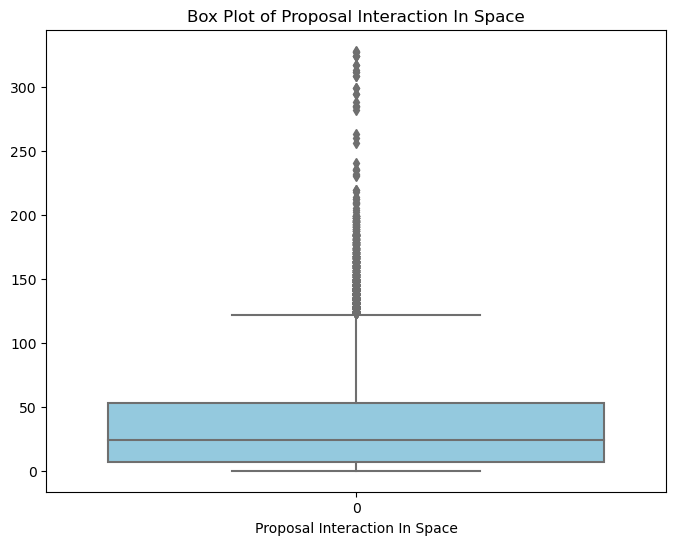

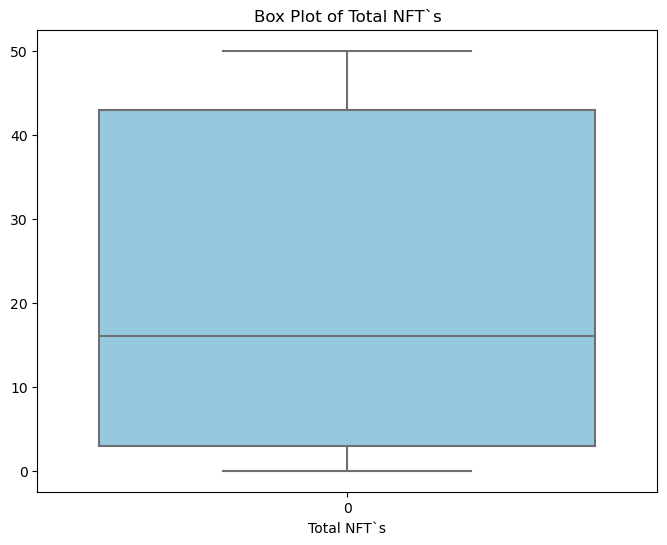

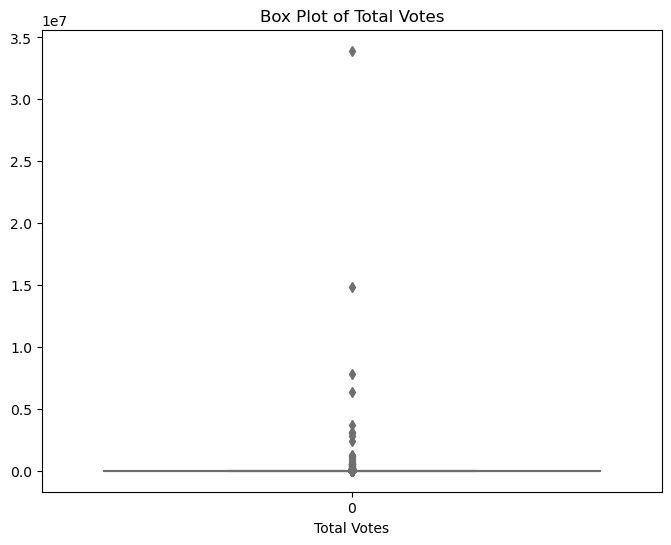

       Proposal Interaction In Space  Total NFT`s  Total Votes  \
0                                256            1     33928250   
1                                184            0     14854885   
2                                 96            0      7785688   
3                                151           23      6334190   
4                                 57            0      3722838   
...                              ...          ...          ...   
15891                             98           50            0   
15892                              8            0            0   
15893                             35           13            0   
15894                             38           50            0   
15895                             16           27            0   

       Proposal Interaction In Space_Cluster  Total NFT`s_Cluster  \
0                                          1                    1   
1                                          1                    1   


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Box plot for each column
for col in selected_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_selected[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# Clustering for each column
for col in selected_columns:
    # Reshape the data to be a 2D array (required by KMeans)
    X = df_selected[col].values.reshape(-1, 1)

    # Define the number of clusters (you can adjust this as needed)
    num_clusters = 3

    # Create the KMeans clustering model
    kmeans = KMeans(n_clusters=num_clusters)

    # Fit the model to the data
    kmeans.fit(X)

    # Get the cluster centers (centroids)
    cluster_centers = kmeans.cluster_centers_

    # Get the cluster assignments for each data point
    cluster_labels = kmeans.labels_

    # Add the cluster assignments as a new column to the DataFrame
    df_selected[col + '_Cluster'] = cluster_labels

# Print the updated DataFrame with cluster assignments
print(df_selected)

# You can access the cluster assignments for each column like this:
print("Cluster assignments for Proposal Interaction In Space:", df_selected['Proposal Interaction In Space_Cluster'].unique())
print("Cluster assignments for Total NFT`s:", df_selected['Total NFT`s_Cluster'].unique())
print("Cluster assignments for Total Votes:", df_selected['Total Votes_Cluster'].unique())


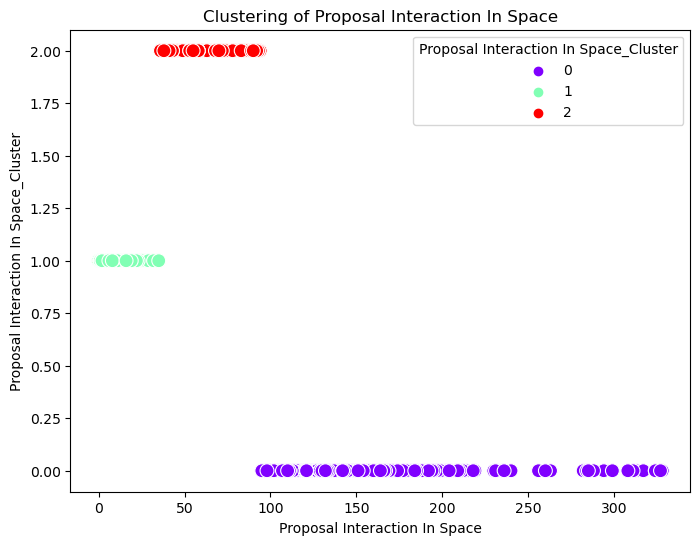

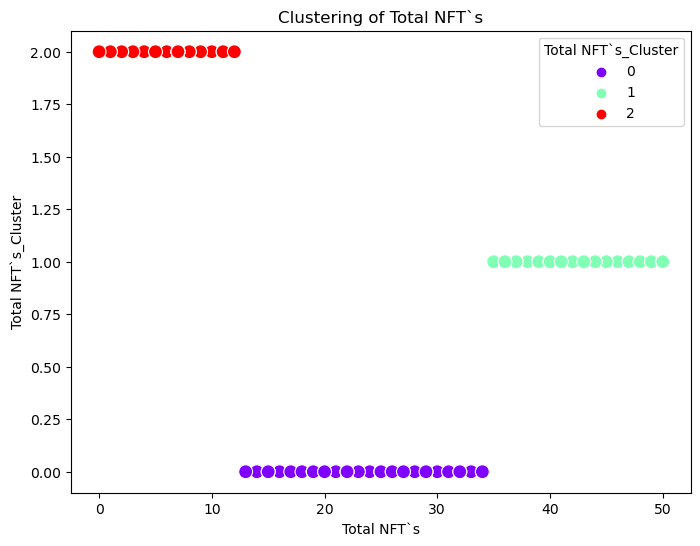

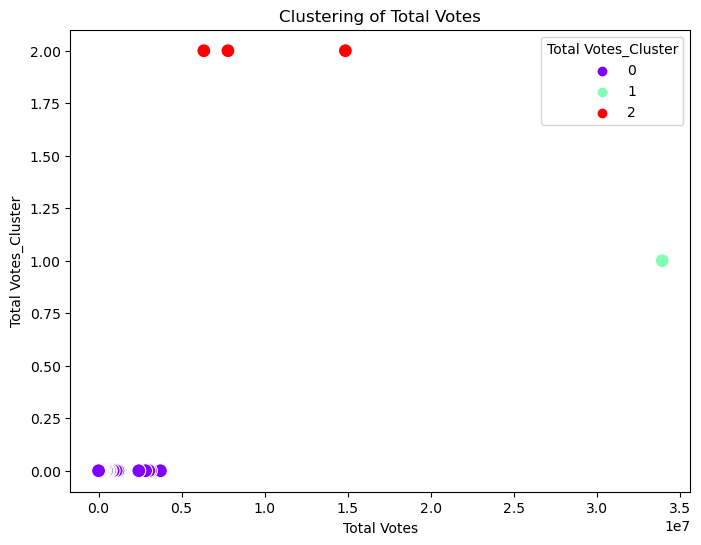

       Proposal Interaction In Space  Total NFT`s  Total Votes  \
0                                256            1     33928250   
1                                184            0     14854885   
2                                 96            0      7785688   
3                                151           23      6334190   
4                                 57            0      3722838   
...                              ...          ...          ...   
15891                             98           50            0   
15892                              8            0            0   
15893                             35           13            0   
15894                             38           50            0   
15895                             16           27            0   

       Proposal Interaction In Space_Cluster  Total NFT`s_Cluster  \
0                                          0                    2   
1                                          0                    2   


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'

# Selecting only the relevant columns
selected_columns = ['Proposal Interaction In Space', 'Total NFT`s', 'Total Votes']
df_selected = df[selected_columns].copy()

# Convert selected columns to integers
df_selected[selected_columns] = df_selected[selected_columns].astype(int)

# Clustering and Visualization for each column
for col in selected_columns:
    # Reshape the data to be a 2D array (required by KMeans)
    X = df_selected[col].values.reshape(-1, 1)

    # Define the number of clusters (you can adjust this as needed)
    num_clusters = 3

    # Create the KMeans clustering model
    kmeans = KMeans(n_clusters=num_clusters)

    # Fit the model to the data
    kmeans.fit(X)

    # Get the cluster centers (centroids)
    cluster_centers = kmeans.cluster_centers_

    # Get the cluster assignments for each data point
    cluster_labels = kmeans.labels_

    # Add the cluster assignments as a new column to the DataFrame
    df_selected[col + '_Cluster'] = cluster_labels

    # Visualize the clustering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y=col+'_Cluster', data=df_selected, palette='rainbow', hue=col+'_Cluster', legend='full', s=100)
    plt.title(f'Clustering of {col}')
    plt.xlabel(col)
    plt.ylabel(f'{col}_Cluster')
    plt.show()

# Print the updated DataFrame with cluster assignments
print(df_selected)

# You can access the cluster assignments for each column like this:
print("Cluster assignments for Proposal Interaction In Space:", df_selected['Proposal Interaction In Space_Cluster'].unique())
print("Cluster assignments for Total NFT`s:", df_selected['Total NFT`s_Cluster'].unique())
print("Cluster assignments for Total Votes:", df_selected['Total Votes_Cluster'].unique())
